## Plots

In [38]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
import pandas as pd
import seaborn as sns

def plot(p_data, p_yId, p_xId, p_styleId, p_logScale=False, p_marker_label=False, p_marker_value=0, p_export_filename=None, p_xLabel=None, p_yLabel=None):
    rcParams['figure.figsize'] = 6,4
    rcParams['font.size'] = 12
    rcParams['svg.fonttype'] = 'none'
    plot = sns.lineplot(x=p_xId,
                        y=p_yId,
                        style=p_styleId,
                        data=p_data)
    if p_logScale == True:
        plot.set_yscale('log')
        plot.set_xscale('log')
    
    
    if p_xLabel != None:
        plot.set(xlabel=p_xLabel)
    else:
        plot.set(xlabel=p_xId)

    if p_yLabel != None:
        plot.set(ylabel=p_yLabel)
    else:
        plot.set(ylabel=p_yId)


    plt.grid(color='gainsboro')
    plt.grid(True,which='minor', linestyle='--', linewidth=0.5, color='gainsboro') 

    if(p_marker_label != False):
        plt.axhline(p_marker_value, linestyle='--', color='red', label=p_marker_label)
        plt.legend()


    if(p_export_filename != None):
        plt.savefig(p_export_filename)

    plt.show()

### Gauss3

#### Arithmetic Intensity by cost

##### Empirically Determined Parameters

based on `src_master_thesis/node_characterization/likwid-bench_gauss3.out`:

In [39]:
emp_flops_max=2459.32383
emp_mem_band=233.172

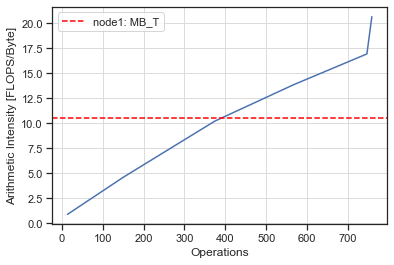

In [40]:
import pandas as pd
import seaborn as sns

sns.set_theme()
sns.set_style("ticks")

maschine_balance=emp_flops_max/emp_mem_band

ops_data = pd.read_csv('./e_measure_ops.csv')
ops_data['func_id'] = ops_data.apply(lambda row: f'nonlinear_{row["func_id"].lower()}', axis=1)


roofline_data = pd.read_csv('./e_roofline_old.csv')

roofline_data = roofline_data[roofline_data.region_id == 'apply']
roofline_data = roofline_data.merge(ops_data, left_on='impl_id', right_on='func_id')
roofline_data['func_id'] = 'function cost'
roofline_data['ai']=roofline_data.apply(lambda row: (row['mflop_s']/row['mbytes_s']), axis=1)

# #
# # NOTE: add maschine balance
# #
# roofline_data_copy = roofline_data.copy()
# roofline_data_copy['func_id'] = 'maschine balance'
# roofline_data_copy['ai'] = maschine_balance
# roofline_data = roofline_data_copy.append(roofline_data)

# display(roofline_data)

plot(p_data=roofline_data,
    p_yId='ai',
    p_xId='ops',
    # p_hueId='func_id',
    p_styleId=None,
    p_logScale=False,
    p_marker_label='node1: MB_T',
    p_marker_value=maschine_balance,
    p_export_filename='ai_by_costs.svg',
    p_xLabel='Operations',
    p_yLabel='Arithmetic Intensity [FLOPS/Byte]')

#### Performance by cost

,node_id,bench_id,impl_id,region_id,obj_cols,obj_rows,obj_levels,obj_cells,threads,mflop_s,mbytes_s,func_id,ops
0,gauss4,e_roofline,nonlinear_pow2,apply,1024,1024,1024,1073741824,128,200284.1210,225663.5252,nonlinear_pow2,14
1,gauss4,e_roofline,nonlinear_exp,apply,1024,1024,1024,1073741824,128,899734.5041,196085.3308,nonlinear_exp,150
2,gauss4,e_roofline,nonlinear_pow4_3,apply,1024,1024,1024,1073741824,128,739720.6792,72449.4885,nonlinear_pow4_3,374
3,gauss4,e_roofline,nonlinear_costly_0,apply,1024,1024,1024,1073741824,128,720769.8869,52070.6369,nonlinear_costly_0,566
4,gauss4,e_roofline,nonlinear_costly_1,apply,1024,1024,1024,1073741824,128,734015.8833,35528.6988,nonlinear_costly_1,758
5,gauss3,e_roofline,nonlinear_costly_2,apply,1024,1024,1024,1073741824,128,738829.0969,43622.7623,nonlinear_costly_2,746


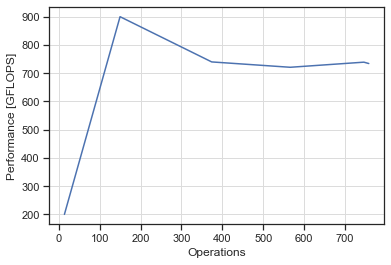

In [41]:
import pandas as pd
import seaborn as sns

sns.set_theme()
sns.set_style("ticks")

ops_data = pd.read_csv('./e_measure_ops.csv')
ops_data['func_id'] = ops_data.apply(lambda row: f'nonlinear_{row["func_id"].lower()}', axis=1)

roofline_data = pd.read_csv('./e_roofline_old.csv')
roofline_data = roofline_data[roofline_data.region_id == 'apply']
roofline_data = roofline_data.merge(ops_data, left_on='impl_id', right_on='func_id')

display(roofline_data)

roofline_data['gflop_s']=roofline_data.apply(lambda row: (row['mflop_s']/1000), axis=1)


plot(p_data=roofline_data,
    p_yId='gflop_s',
    p_xId='ops',
    p_styleId=None,
    p_logScale=False,
    p_export_filename='performance_by_ops.svg',
    p_xLabel='Operations',
    p_yLabel='Performance [GFLOPS]')